## Daniel Ruhman e Marcelo Prado

# Entregável 1 - visão computacional

In [150]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 3.1.0 


# Equalização de histograma

In [151]:
rintin = cv2.imread("RinTinTin.jpg")

In [152]:
rintin.shape

(240, 320, 3)

In [153]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [154]:
rintin_gray.shape

(240, 320)

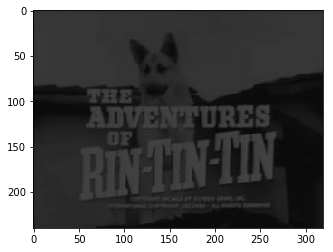

In [155]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

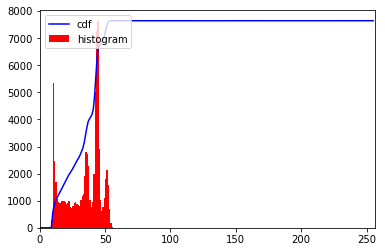

In [156]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

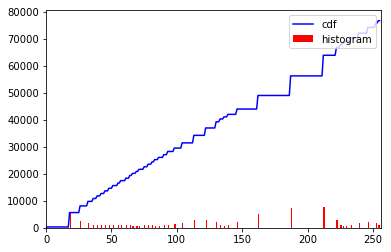

In [157]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized =cdf * hist.max()/ cdf.max()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[rintin_gray]

hist2,bins2 = np.histogram(img2.flatten(),256,[0,256])
cdfequ = hist2.cumsum()

plt.plot(cdfequ, color = 'b')

plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([img2.flatten().min(),256])
plt.legend(('cdf','histogram'), loc = 'upper right')
plt.show()

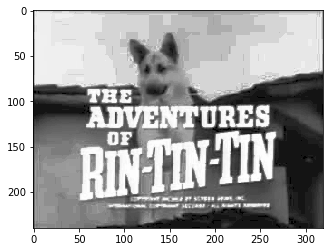

In [158]:
plt.imshow(img2, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


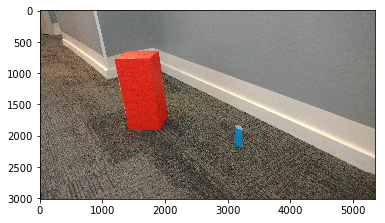

In [159]:
objetos = cv2.imread("hall_box_battery1.jpg")
objetos_colorido = cv2.cvtColor(objetos, cv2.COLOR_BGR2RGB)
plt.imshow(objetos_gray, cmap="Greys_r", vmin=0, vmax=255)

Canal R
Perceba como a caixa vermelha está branca. Isso significa que conseguimos extrarir o canal Red da imagem


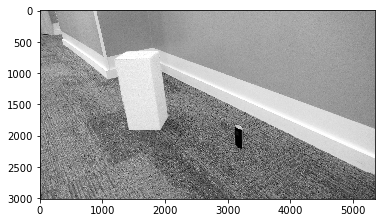

In [160]:
picRed = objetos_colorido[:,:,0]
print('Canal R')
print('Perceba como a caixa vermelha está branca. Isso significa que conseguimos extrarir o canal Red da imagem')
plt.imshow(picRed, cmap='Greys_r')

Canal R
Perceba como a bateria azul está branca. Isso significa que conseguimos extrarir o canal Red da imagem


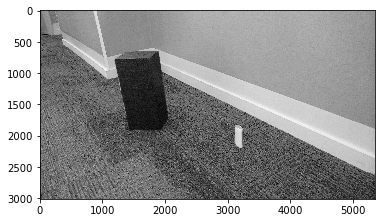

In [166]:
picBlue = objetos_colorido[:,:,2]
print('Canal R')
print('Perceba como a bateria azul está branca. Isso significa que conseguimos extrarir o canal Red da imagem')
plt.imshow(picBlue, cmap='Greys_r')

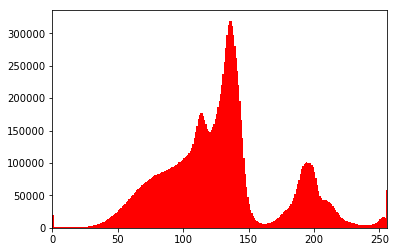

In [162]:
plt.hist(picRed.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

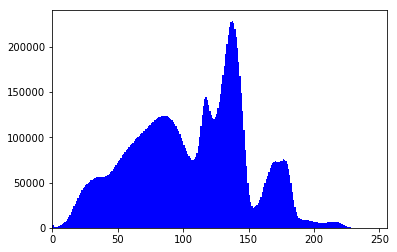

In [163]:
plt.hist(picBlue.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.show()

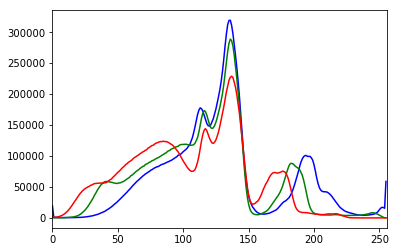

In [164]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([objetos_colorido],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### Análise

Extraindo os canais R e B da imagem, pode-se perceber que obtemos imagens nas quais a bateria azul e a caixa vermelha estão em branco em comparação ao resto da imagem. Ao plotar os histogramas dos canais R e B, vemos que há uma maior frequência de azul e vermelho na faixa de 120-150 na escala de cor.

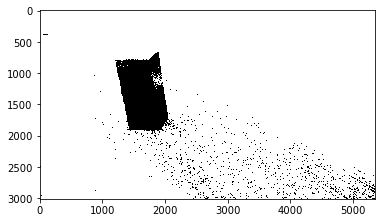

In [165]:
blur = cv2.bilateralFilter(objetos_colorido,9,75,75)
ret1,thresh1 = cv2.threshold(blur[:,:,0],150,255,cv2.THRESH_BINARY)
ret2,thresh2 = cv2.threshold(blur[:,:,1],50,150,cv2.THRESH_BINARY)
plt.imshow(thresh2,cmap="Greys_r")

### Bônus

Na imagem acima, observamos a extração da caixa vermelha por meio de uso de threshods do openCV. Ao invés de filtrarmos apenas um canal de cor, pegamos faixas especificas de cada canal que nos interessa (nesse caso pegamos o Red e isolamos faixas de Green para remover o fundo). Além disso, é aplicado um blur para reduzir o ruido.